# Reading the files 

We are going to use the Million Song Dataset, a freely-available collection of audio features and metadata for a million contemporary popular music tracks.

There are two files that will be interesting for us. The first of them will give us information about the songs. Particularly, it contains the user ID, song ID and the listen count. On the other hand, the second file will contain song ID, title of that song, release, artist name and year. We need to merge these two DataFrames. For that aim, we'll use the song_ID


# Importing required libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from tkinter import *
from PIL import Image, ImageTk

In [2]:
#song_info = pd.read_csv('https://static.turi.com/datasets/millionsong/10000.txt',sep='\t',header=None)
#song_info.columns = ['user_id', 'song_id', 'listen_count']

#Read song  metadata
#song_actual =  pd.read_csv('https://static.turi.com/datasets/millionsong/song_data.csv')
#song_actual.drop_duplicates(['song_id'], inplace=True)

#Merge the two dataframes above to create input dataframe for recommender systems
#songs = pd.merge(song_info, song_actual, on="song_id", how="left")
from knn_recommender.recommender import Recommender

In [3]:
#songs.to_csv('songs.csv',index=False)

In [4]:
df_songs=pd.read_csv('songs.csv')

In [5]:
df_songs.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [6]:
df_songs.shape

(1048575, 7)

In [7]:
print(f'There are {df_songs.shape[0]} observations in the dataset')

There are 1048575 observations in the dataset


# cleaning of data no missing values can be seen

In [8]:
df_songs.isnull().sum()

user_id         0
song_id         0
listen_count    0
title           0
release         0
artist_name     0
year            0
dtype: int64

In [9]:
df_songs.dtypes

user_id         object
song_id         object
listen_count     int64
title           object
release         object
artist_name     object
year             int64
dtype: object

In [10]:
#unique_song,users,artists
unique_songs=df_songs['title'].unique().shape[0]
unique_songs

9567

In [11]:
unique_artist=df_songs['artist_name'].unique().shape[0]
unique_artist

3375

In [12]:
unique_users=df_songs['user_id'].unique().shape[0]
unique_users

40336

In [13]:
#count the most popular songs,10 most popular songs
ten_pop_songs=df_songs.groupby('title')['listen_count'].count().reset_index().sort_values(['listen_count','title'],ascending=[0,1])
ten_pop_songs['percentage']=round(ten_pop_songs['listen_count'].div(ten_pop_songs['listen_count'].sum())*100,2)

In [14]:
ten_pop_songs=ten_pop_songs[:10]
ten_pop_songs

,title,listen_count,percentage
6836,Sehr kosmisch,4368,0.42
8725,Undo,3693,0.35
1964,Dog Days Are Over (Radio Edit),3676,0.35
9496,You're The One,3508,0.33
6498,Revelry,3179,0.30
6825,Secrets,3051,0.29
3437,Horn Concerto No. 4 in E flat K495: II. Romanc...,2830,0.27
2595,Fireflies,2514,0.24
3322,Hey_ Soul Sister,2469,0.24
8494,Tive Sim,2402,0.23


In [15]:
labels=ten_pop_songs['title'].tolist()
counts=ten_pop_songs['listen_count'].tolist()

In [16]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

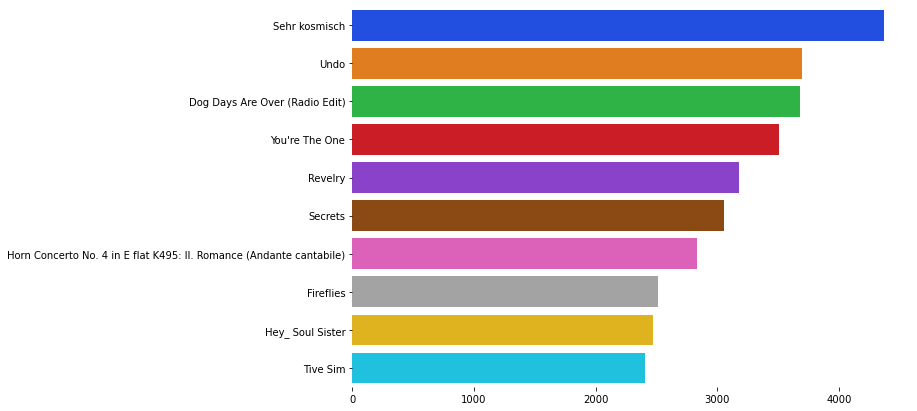

In [17]:
plt.figure(figsize=(10,7))
sns.barplot(x=counts,y=labels,palette='bright')
sns.despine(left=True,bottom=True)
#plt.bar(labels,counts,color='maroon',width=0.4)

In [18]:
#artist 10 most popular artist
ten_pop_artist=df_songs.groupby('artist_name')['listen_count'].count().reset_index().sort_values(['listen_count','artist_name'],ascending=[0,1])
ten_pop_artist=ten_pop_artist[:10]
ten_pop_artist

,artist_name,listen_count
649,Coldplay,15343
2850,The Black Keys,10589
1651,Kings Of Leon,9627
1107,Florence + The Machine,9524
1370,Jack Johnson,8726
2946,The Killers,8139
2374,Radiohead,8058
736,Daft Punk,7612
1554,Justin Bieber,7291
2073,Muse,7160


In [19]:
counts=ten_pop_artist['listen_count'].tolist()
labels=ten_pop_artist['artist_name'].tolist()

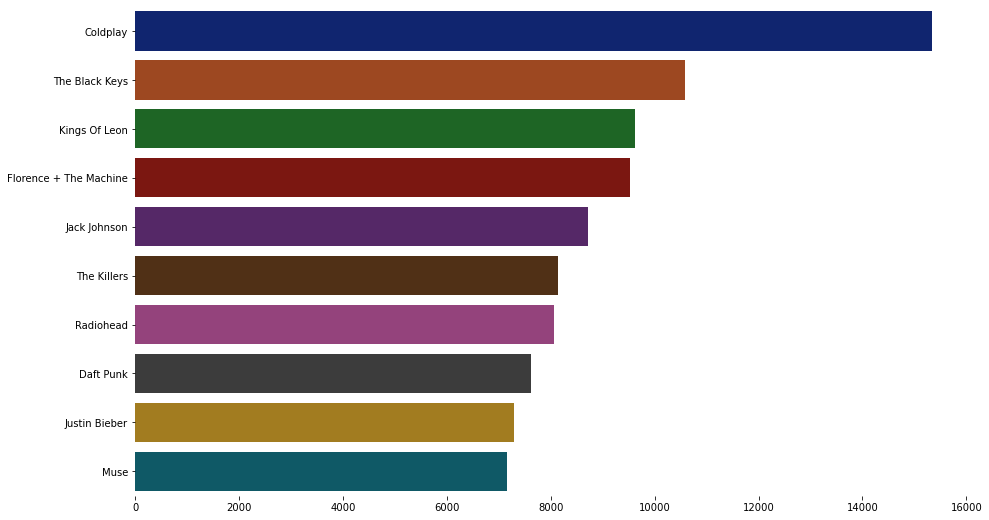

In [20]:
plt.figure(figsize=(15,9))
sns.barplot(x=counts,y=labels,palette='dark')
sns.despine(left=True,bottom=True)

# Listen count by user


the other information that can be derived from the feature listen count is maximum time the same user listen to same song and on an average the number of times same user listens to the same song 

In [21]:
#max time
listen_counts=pd.DataFrame(df_songs.groupby('listen_count').size(),columns=['count'])
listen_counts.reset_index(drop=False)['listen_count'].iloc[-1]

920

In [22]:
#average
df_songs['listen_count'].mean()

3.0465403046992345

In [23]:
#average for same user listening to the same song
print(f"on an average a user listens to {round(df_songs['listen_count'].mean())} times")

on an average a user listens to 3 times


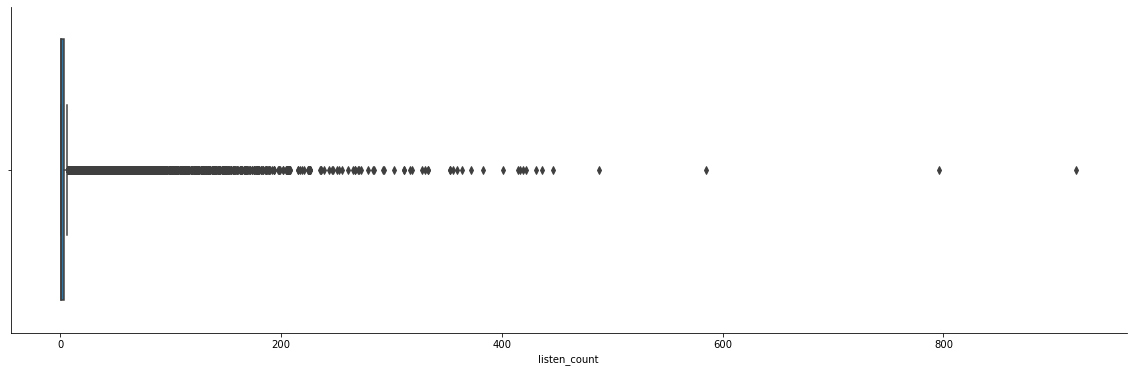

In [24]:
#distribution of listen_count
plt.figure(figsize=(20,6))
#plt.boxplot(df_songs['listen_count'])
sns.boxplot(x='listen_count',data=df_songs)
sns.despine()

# Songs User listens on an average

In [25]:
song_user = df_songs.groupby('user_id')['song_id'].count()
print(f"A user listens to an average of {np.mean(song_user)} songs")

A user listens to an average of 25.99600852836176 songs


In [26]:
print(f"{np.median(song_user)} songs, with minimum {np.min(song_user)} and maximum {np.max(song_user)} songs")

16.0 songs, with minimum 1 and maximum 711 songs


We can see that a user listens in average to 26 songs. Even the maximum amount of songs listen by an user is 711, and we have 9567 songs in our dataset.

So, not all user listen to all songs, so a lot of values in the song x users matrix are going to be zero. Thus, we’ll be dealing with extremely sparse data.

In [27]:
# Get how many values should it be if all songs have been listen by all users
values_matrix = unique_users * unique_songs
values_matrix

385894512

In [28]:
# Substract the total values with the actural shape of the DataFrame songs
df_songs.shape[0]
zero_values_matrix = values_matrix - df_songs.shape[0]
zero_values_matrix

384845937

In [29]:
print(f"The matrix of users x songs has {zero_values_matrix} values that are zero")

The matrix of users x songs has 384845937 values that are zero


Dealing with such a sparse matrix, will take a lot of memory and resources. we will select all those users that have listened to at least 16 songs.

# Preparing the data to be used in the model

In [30]:
# Get users which have listen to at least 16 songs
song_ten_id = song_user[song_user > 16].index.to_list()

In [31]:
# Filtered the dataset to keep only those users with more than 16 listened
df_song_id_more_ten = df_songs[df_songs['user_id'].isin(song_ten_id)].reset_index(drop=True)
df_song_id_more_ten.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


We need now to work with a scipy-sparse matrix to avoid overflow and wasted memory. For that purpose, we'll use the csr_matrix function from scipy.sparse.

In [32]:
# convert the dataframe into a pivot table
df_songs_features = df_song_id_more_ten.pivot(index='song_id', columns='user_id', values='listen_count').fillna(0)

# obtain a sparse matrix
mat_songs_features = csr_matrix(df_songs_features.values)

In [33]:
#now taking a look at the table user x song.
df_songs_features.head()

user_id,000ebc858861aca26bac9b49f650ed424cf882fc,000ef25cc955ad5841c915d269432eea41f4a1a5,0012bf75d43a724f62dc746d9e85ae0088a3a1d6,00185e316f07f0f00c325ca034be59c15b362401,001b005fe5e80d3cb45f320f5658fc8e2e72794e,001f22c638730aed5659034c447d3cf0e658898e,002543003041db1d049206b09426d5cdffc0f451,0028292aa536122c1f86fd48a39bd83fe582d27f,00292cf9c6d6e99c5ddbece7e37f957ab1362d25,00296f66ed7fb84c876486aecc9fab2d5809576d,...,ffcfb0b34a47fdf55b3d96c1799cd196677f8261,ffd6f34b343cee62cd7dbbf20fb1ab1119b299e5,ffdaab327f2fc6b9fa01a4e3e7f41fdd0e468046,ffdbaeb5cf2081eb34053a655c20f57524de11ba,ffebfec313fd515a11faba060b022f030b57fac0,fff22417a61c1ba3ee2592b22a052ed6a27a8e91,fff300cd094fe04030b79fae550dc9d065190182,fff543db7918cb8f4f56f7470903eb2f1d5a6dd8,fff6c30c773e6ffafcac213c9afd9666afaf6d63,fffce9c1537fbc350ea68823d956eaa8f5236dbe
song_id,,,,,,,,,,,,,,,,,,,,,
SOAAAGQ12A8C1420C8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAACPJ12A81C21360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAACSG12AB018DC80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAAEJI12AB0188AB5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAAFAC12A67ADF7EB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Because the system will output the id of the song, instead of the title, we'll make a function that maps those indices with the song title.

In [34]:
df_unique_songs = df_songs.drop_duplicates(subset=['song_id']).reset_index(drop=True)[['song_id', 'title']]

In [35]:
decode_id_song = {
    song: i for i, song in 
    enumerate(list(df_unique_songs.set_index('song_id').loc[df_songs_features.index].title))
}

# Models And Recommendations

In [ ]:
model = Recommender(metric='cosine',algorithm='brute', k=20, data=mat_songs_features, decode_id_song=decode_id_song)
window=Tk()
window.title("Music Recommendation")
window.geometry('1500x900')
l1=Label(window,text='MUSIC RECOMMENDATION',font=('Arial',50,'bold'),fg='magenta')
l1.place(x='270',y='50',width='1000',height='200')
e1=Entry(window,fg='black',font=('Arial',16,'bold'))
e1.insert(0,"Enter Your Song")
e1.place(x='550',y='250',width='330',height='30')

def create_table():
    song=e1.get()
    new_recommendations = model.make_recommendation(new_song=song, n_recommendations=10)
    new_recommendations.insert(0,song)
    row_len=len(new_recommendations)
    col_len=1
    a=380
    b=500
    l=Label(window,text='Recommended List Of Songs',font=('Arial',30,'bold'),fg='red')
    l.place(x='380',y='440')
    for i in range(row_len): 
            for j in range(col_len): 
                e = Entry(window, width=60, fg='white',font=('Arial',16,'bold'),bg='black')                   
                e.place(x=a,y=b)
                b=b+30
                e.insert(END, new_recommendations[i])
def clear():
    e1.delete(0,'end')

b1=Button(window,text='Search',fg='white',bg='black',command=create_table)
b1.place(x='870',y='330')
b2=Button(window,text='Cancel',fg='white',bg='black',command=window.destroy)
b2.place(x='670',y='330')
b3=Button(window,text='Clear',fg='white',bg='black',command=clear)
b3.place(x='470',y='330')


window.mainloop()

Starting the recommendation process for I believe in miracles ...
... Done
